In [1]:
import yaml

In [4]:
# load menu
with open("mnt/city-directories/01-user-input/menu.yml", 'r') as f:
    menu = yaml.safe_load(f)

In [16]:
pip install google-cloud-translate


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install lxml

  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/bc/7e/4c66526e9b4f9c46afd7b2fef4482857d38752f2ee7cbb218816c5468251/lxml-5.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
if menu['raster_processing']:
    print('run raster_processing')
    
    import os
    import math
    import csv
    import geopandas as gpd
    import numpy as np
    import rasterio.mask
    import rasterio
    import requests
    from pathlib import Path
    from rasterio.merge import merge
    from os.path import exists
    import zipfile
    from rasterio.warp import calculate_default_transform, reproject, Resampling
    from shutil import copyfile
    import os
    import glob
    from io import StringIO
    import requests
    from sklearn.preprocessing import MinMaxScaler
    from shapely.geometry import shape
    from shapely.ops import unary_union
    import pint
    import folium
    from pathlib import Path
    import matplotlib.pyplot as plt
    import requests
    import re
    import rasterio
    from rasterio.mask import mask
    from shapely.geometry import Point
    from fiona.crs import from_epsg
    from nbconvert import MarkdownExporter
    import nbformat
    import base64
    import pickle
    from google.cloud import translate_v2 as translate
    import lxml.etree as ET
    import zipfile


run raster_processing


read AOI shapefile


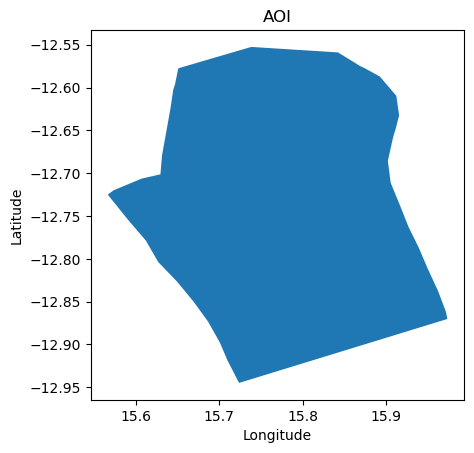

In [33]:
# SET UP ##############################################

# load city inputs files, to be updated for each city scan
with open("city_inputs.yml", 'r') as f:
    city_inputs = yaml.safe_load(f)

city = city_inputs['city_name'].replace(' ', '_').lower()
country = city_inputs['country_name'].replace(' ', '_').lower()
# load global inputs, such as data sources that generally remain the same across scans
with open("global_inputs.yml", 'r') as f:
    global_inputs = yaml.safe_load(f)

# Read AOI shapefile --------
print('read AOI shapefile')
# transform the input shp to correct prj (epsg 4326)
aoi_file = gpd.read_file(city_inputs['AOI_path']).to_crs(epsg = 4326)
features = aoi_file.geometry

# Define output folder ---------
output_folder = Path('mnt/city-directories/02-process-output')

if not os.path.exists(output_folder):
    os.mkdir(output_folder)
    
fig, ax = plt.subplots()
features.plot(ax=ax)
plt.title('AOI')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()